In [254]:
p = 0.0844
import numpy as np
import torch
from scipy.stats import binom
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
prob = np.load('src/node_dist.npy')

In [6]:
node_dist =  torch.distributions.Categorical(torch.tensor(prob))
# sample 1 value
n = node_dist.sample()
print(n)

tensor(76)


<BarContainer object of 188 artists>

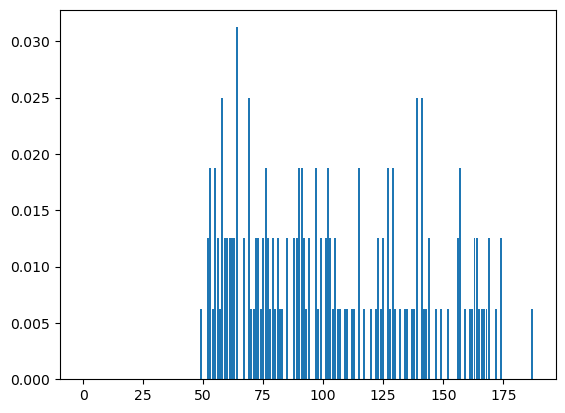

In [9]:
# draw distribution
import matplotlib.pyplot as plt
indices = torch.arange(len(prob))
plt.bar(indices, prob)

In [332]:
degree_dist = binom(n-1,p)
def get_graph_from_d(dd):
    degrees = degree_dist.rvs(n)
    while sum(degrees) % 2 != 0:
        degrees = dd.rvs(n)
    while 1:
        try:
            G = nx.havel_hakimi_graph(degrees)
            break
        except nx.exception.NetworkXError:
            degrees = dd.rvs(n)
    return G

degree_assortativity_coefficients1 = []
degree_assortativity_coefficients2 = []
for i in range(1000):
    G = get_graph_from_d(degree_dist)
    r = nx.degree_assortativity_coefficient(G)
    degree_assortativity_coefficients1.append(r)
    ERG = nx.binomial_graph(n, p)
    degree_assortativity_coefficients2.append(nx.degree_assortativity_coefficient(ERG))
print(np.mean(degree_assortativity_coefficients1), np.var(degree_assortativity_coefficients1))
print(np.mean(degree_assortativity_coefficients2), np.var(degree_assortativity_coefficients2))

0.8058342941761043 0.002463916978682504
-0.03100769195976979 0.004128066448744448


In [71]:
"""
simulation_time = 100000
err_time = 0
for i in range(simulation_time):
    degrees = degree_dist.rvs(n)
    while sum(degrees) % 2 != 0:
        degrees = degree_dist.rvs(n)
    try:
        G = nx.havel_hakimi_graph(degrees)
    except nx.exception.NetworkXError:
        err_time += 1
        
print(err_time/simulation_time)
"""

0.0


876.3824710000001 481.277
871.0020990400002 480.9564


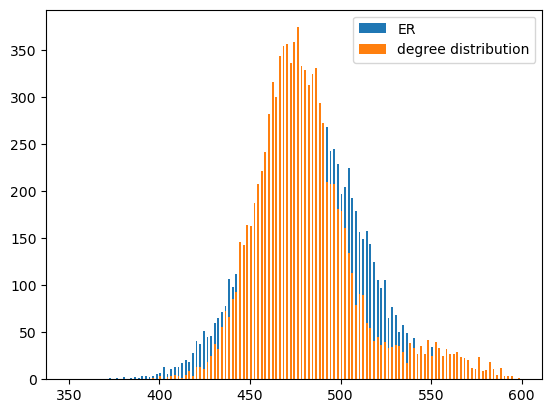

In [452]:
# generate ER random graph
rv = binom(n-2, p)
rv_offset = binom(1,p)
degrees = []

degrees2 = []

for i in range(10000):
    G = nx.binomial_graph(n, p)
    degrees.append(sum([G.degree(node) for node in G.nodes()]))
    y = rv.rvs(n)
    z = rv_offset.rvs()
    f = [y[i] + z for i in range(n)]
    while sum(f) % 2 != 0:
        y = rv.rvs(n)
        f = [y[i] + z for i in range(n)]
    degrees2.append(sum(f))
#histogram
plt.hist(degrees, bins=range(350, 600, 1))
plt.hist(degrees2, bins=range(350, 600, 1))

# print var and mean
print(np.var(degrees), np.mean(degrees))
print(np.var(degrees2), np.mean(degrees2))
# legend
plt.legend(['ER', 'degree distribution'])

In [377]:
2*(n-1)*n*p*(1-p)

tensor(880.9537)

In [434]:
n * (n-1) * p

tensor(481.0800)

In [329]:
nn = 10000
rv = binom(nn-1, p)
rds = rv.rvs(nn)
while sum(degrees) % 2 != 0:
    degrees = rv.rvs(nn)
G = nx.binomial_graph(nn, p)
gds = [G.degree(node) for node in G.nodes()]


print(np.var(rds), np.mean(rds))
print(np.var(gds), np.mean(gds))

777.54161104 844.0836
768.40823216 843.3972


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

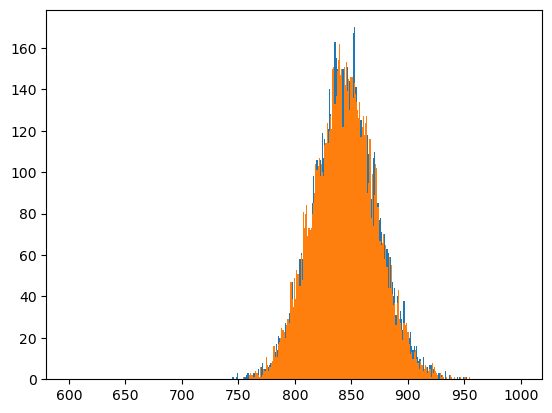

In [330]:
plt.hist(rds, bins=range(600, 1000, 1))
plt.hist(gds, bins=range(600, 1000, 1))

In [450]:
rv_x = binom(n-2, p)
rv_z = binom(1,p)
Y = []

for i in range(10000):
    y = rv_x.rvs(n)
    z = rv_z.rvs()
    f = [y[i] + z for i in range(n)]
    Y.append(sum(f))
    
print(np.var(Y), np.mean(Y))

883.4010439100001 480.7603
